# HDF file

In this notebook we explain how to read the content of a Hierarchical Data Format ([HDF](https://www.hdfgroup.org/products/hdf4/whatishdf.html)).<br>
Example of such files can be downloaded, for example, from [Ocean Color](http://oceandata.sci.gsfc.nasa.gov/).
In this example we use chlorophyll concentration measured by SeaWifs (check directory http://oceandata.sci.gsfc.nasa.gov/SeaWiFS/L3SMI/).

In [5]:
hdffile = "../../data/S20100012010032.L3m_R32_CHL_chlor_a_9km"

## Module

There are several modules that provide an interface to the HFD4 library.

For example [PyHDF](http://hdfeos.org/software/pyhdf.php). The installation for Windows (using Anaconda Python) are detailled in the webpage.

Here we will use [python-hdf4](https://pypi.python.org/pypi/python-hdf4) and the corresponding [documentation](http://fhs.github.io/python-hdf4/). The Hierarchical data format 4 library development package (libhdf4-dev) has to be installed prior to the python installation.	 

In [6]:
from pyhdf.SD import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Open the file

In [7]:
d = SD(hdffile)

We check which attributes are available:

In [8]:
print d.attributes()

{'Start Millisec': 64820616, 'Longitude Step': 0.0833333358168602, 'Latitude Step': 0.0833333358168602, 'Title': 'SeaWiFS Level-3 Standard Mapped Image\x00', 'Station Name': 'GSFC HRPT, NASA, MD\x00', 'Mission Characteristics': 'Nominal orbit: inclination = 98.2 (Sun-synchronous); node = 12 noon local (descending); eccentricity = <0.002; altitude = 705 km; ground speed = 6.75 km/sec\x00', 'Start Year': 2009L, 'Suggested Image Scaling Type': 'LOG\x00', 'Start Day': 365L, 'L2 Flag Names': 'ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH,LOWLW,CHLWARN,CHLFAIL,NAVWARN,MAXAERITER,ATMWARN,HISOLZEN,NAVFAIL,FILTER,HIGLINT\x00', 'Suggested Image Scaling Minimum': 0.009999999776482582, 'Latitude Units': 'degrees North\x00', 'Units': 'mg m^-3\x00', 'Software Version': '4.17\x00', 'Sensor': 'Sea-viewing Wide Field-of-view Sensor (SeaWiFS)\x00', 'Sensor Characteristics': 'Number of bands = 8; number of active bands = 8; wavelengths per band (nm) = 412, 443, 490, 510, 555, 670, 765, 865; bits

## Dataset

In [9]:
d.datasets()

{'l3m_data': (('fakeDim0', 'fakeDim1'), (2160, 4320), 5, 0)}

In [10]:
d1 = d.select('l3m_data')

In [11]:
d1.info()

('l3m_data', 2, [2160, 4320], 5, 5)

In [12]:
data = d1[:]

## Coordinates

We generate them using the attributes. Probably it's possible to do it in a different way.

In [13]:
lonmin = d.attributes()['Westernmost Longitude']
lonmax = d.attributes()['Easternmost Longitude']
latmin = d.attributes()['Southernmost Latitude']
latmax = d.attributes()['Northernmost Latitude']
dlon = d.attributes()['Longitude Step']
dlat = d.attributes()['Latitude Step']

In [14]:
lon = np.arange(lonmin, lonmax, dlon)
lat = np.arange(latmin, latmax, dlat)

## Close the data set and the file

In [15]:
d1.endaccess()
d.end()

## Plot

Let's check the dimension and the extreme values.

In [16]:
print data.shape
print data.min(), data.max()

(2160, 4320)
-32767.0 94.0502


We mask the low values.

In [18]:
data = np.ma.masked_equal(data, data.min())

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


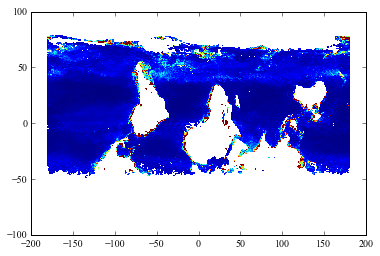

In [19]:
plt.pcolormesh(lon, lat, data, vmin=0, vmax=3.)
plt.show()